<a href="https://colab.research.google.com/github/Eumin-Zoh/Machine-Learning-for-Decision-Making/blob/main/ML_Group_7_Exercies_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 - Linear Regression - GROUP 7

## Dataset
The dataset you will be using is about Life expectancy of different countries. We will explore how immunization factors, mortality factors, economic factors, social factors and other health related factors affect Life expectancy of a country.

There are two data files: "LifeExpectancy_training.csv" and "LifeExpectancy_test.csv"<br/>
Both files have the following fields, except Life_expectancy which is not available in "LifeExpectancy_test.csv"

Features :
- Year : from 2000 to 2015
- Status : Developed or Developing status
- Adult_Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage_expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- BMI: Average Body Mass Index of entire population
- Total_expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population
- Income_composition_of_resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

Target:
- Life_expectancy: Life Expectancy in age


Training dataset, "LifeExpectancy_training.csv", contains 1154 rows and 14 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "LifeExpectancy_test.csv", contains 495 rows and 13 columns. This is the test set which only contains the features.<br/>

Your goal is to predict Life expectancy based on the features.

In [ ]:
import numpy as np
import pandas as pd

Load the training data "LifeExpectancy_training.csv" in Colab and View the first 5 lines

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LifeExpectancy_test.csv to LifeExpectancy_test (4).csv
Saving LifeExpectancy_training.csv to LifeExpectancy_training (4).csv


In [ ]:
# Load the training data
import io
df = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_training.csv']))

In [ ]:
# Show the first 5 lines
### WRITE CODE ###
df.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,71.4


## Data Exploration
We can plot a histogram of the dataframe for the features except "Status" to understand their distributions. <br/>

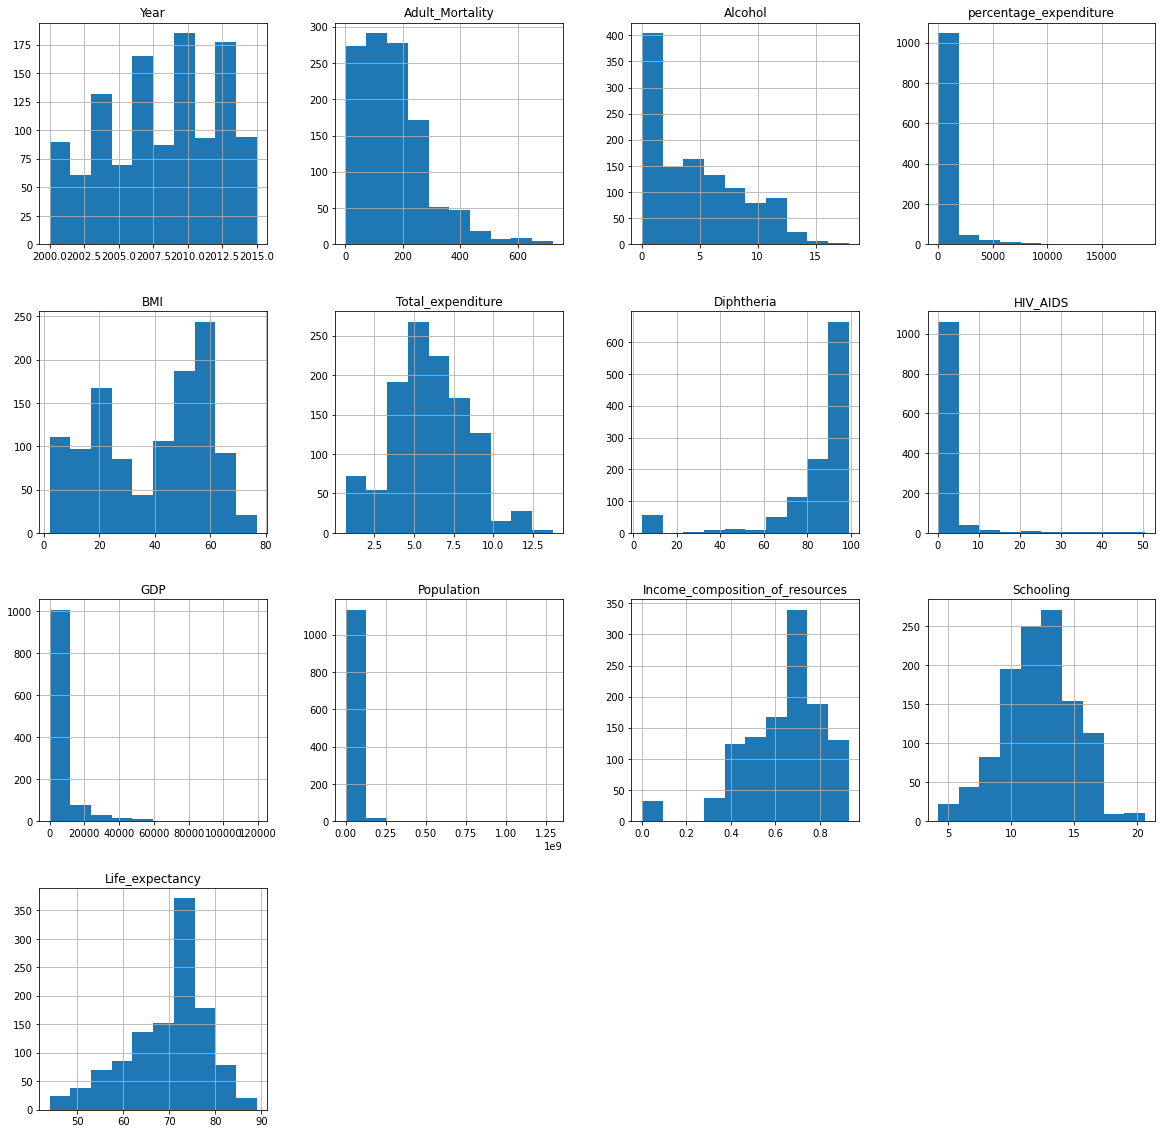

In [ ]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
df.drop("Status",axis=1).hist(figsize=[20,20]);

##### Q1. What can you infer from the histograms? <br/>
Ans-
We can infer individual variable tendencies in the data:
*   Year seems to be oddly distributed, with a repeating pattern, with inconsistent yearly data collection.
*   Adult-mortality, Alcohol, Percentage_expenditure, HIV_AIDS, GDP & Population seems to be skewed to the right
*   Life_expectancy, Diphtheria, income_composition_of_resources seem to be skewed to the left
*   BMI seems to be a bimodal distribution
*   Schooling seems to be normally distributed
*   The average life_expectancy seems to be around 72

We can infer relationships between variables using a correlation matrix.



Compute the correlation matrix to get an understanding of the correlation between life_expectancy and the other features.<br/>

In [ ]:
### WRITE CODE TO OBTAIN CORRELATION MATRIX ###
co=df.corr(method='pearson')
co.style.background_gradient(cmap='viridis').set_properties(**{'text-align': 'center'}).set_precision(2).set_table_styles([dict(selector="th",props=[('max-width', '50px'),('overflow','hidden')])])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Life_expectancy
Year,1.00,-0.04,-0.11,0.07,0.03,0.06,0.04,-0.12,0.10,0.04,0.11,0.10,0.04
Adult_Mortality,-0.04,1.00,-0.22,-0.25,-0.37,-0.14,-0.22,0.52,-0.27,-0.01,-0.48,-0.46,-0.70
Alcohol,-0.11,-0.22,1.00,0.42,0.35,0.22,0.25,-0.05,0.45,-0.01,0.57,0.61,0.44
percentage_expenditure,0.07,-0.25,0.42,1.00,0.22,0.18,0.14,-0.10,0.96,-0.01,0.40,0.42,0.41
BMI,0.03,-0.37,0.35,0.22,1.00,0.19,0.19,-0.23,0.24,-0.06,0.52,0.55,0.55
Total_expenditure,0.06,-0.14,0.22,0.18,0.19,1.00,0.15,0.02,0.18,-0.07,0.18,0.25,0.20
Diphtheria,0.04,-0.22,0.25,0.14,0.19,0.15,1.00,-0.15,0.16,-0.02,0.34,0.36,0.36
HIV_AIDS,-0.12,0.52,-0.05,-0.10,-0.23,0.02,-0.15,1.00,-0.12,-0.03,-0.27,-0.23,-0.59
GDP,0.10,-0.27,0.45,0.96,0.24,0.18,0.16,-0.12,1.00,-0.02,0.45,0.46,0.44
Population,0.04,-0.01,-0.01,-0.01,-0.06,-0.07,-0.02,-0.03,-0.02,1.00,0.01,-0.02,-0.01


##### Answer the following questions:<br/>

##### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
Ans- Because variables are perfectly linearly correlated with itself.

##### Q3. Why is the matrix symmetric along diagonal?<br/>
Ans- Correlation from a-b is the same as b-a, or commutative.

##### Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with Life_expectancy as the outcome, which one would you choose and why? <br/>
Ans- Schooling seems to have the largest absolute correlation with life_expectancy, and thus would be able to be the best predictor among the given variables.


### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$ 

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization. 

Perform Z-score Normalization on the features (except "Year" and "Status") in both training and test set. 

In [ ]:
# Load the test set "LifeExpectancy_test.csv"
### WRITE CODE ###
df_test = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_test.csv']))

In [ ]:
from sklearn.preprocessing import StandardScaler
### WRITE CODE TO PERFORM Z-score Normalization ###
scaler=StandardScaler()

num_cols=df.drop(["Life_expectancy","Year"],axis=1).select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.values

df_scaled=pd.concat([pd.DataFrame(scaler.fit_transform(df[num_cols]),columns=num_cols),df.drop(num_cols,axis=1)],axis=1)

df_test_scaled=pd.concat([pd.DataFrame(scaler.transform(df_test[num_cols]),columns=num_cols),df_test.drop(num_cols,axis=1)],axis=1)

##### Q5. What are the advantages and disadvantages of using Z-score Normalization?<br/>
Ans-  
ADVANTAGES:
It makes the scale of all the variables uniform:
*  Compare results from different models
*  Approximately compare coefficients from different variables
*  Regularization would not disproportionally affect different variables

DISADVANTAGES:
*  We'd lose out on units/scale of the original data when interpreting models
*  We would have to separately store and compute the transformation for new/test data
*  Z-score doesn't take into account skeweness in the data, maybe features aren't normally distributed.

##### Q6. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
Ans- Yes. 
It helps us compare coefficients and the variability from different variables during analysis, improving interpretability, which is beneficial.

### One-Hot Encoding

"Year" and "Status" can only take discrete values. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Perform one-hot encoding on "Year" and "Status" and print the shape of your encoded array

In [ ]:
from sklearn.preprocessing import OneHotEncoder
### WRITE CODE TO PERFORM ONE-HOT CODING ON "Year" AND "Status" ###
enc = OneHotEncoder()
df_scaled_encoded=pd.concat(
    [pd.DataFrame(enc.fit_transform(df_scaled[["Year","Status"]]).toarray(),columns=enc.get_feature_names(['Year', 'Status'])),
                                              df_scaled.drop(["Year","Status"],axis=1)],axis=1)

df_test_scaled_encoded=pd.concat(
    [pd.DataFrame(enc.transform(df_test_scaled[["Year","Status"]]).toarray(),columns=enc.get_feature_names(['Year', 'Status'])),
                                              df_test_scaled.drop(["Year","Status"],axis=1)],axis=1)

df_scaled_encoded=df_scaled_encoded.drop('Year_2000',axis=1)
df_test_scaled_encoded=df_test_scaled_encoded.drop('Status_Developed',axis=1)

# Print the shape of your encoded X
df_scaled_encoded.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1154, 29)

Q7. What are the advantages and disadvantages of using One-hot encoding?

Ans- 
ADVANTAGES:

Helps us gain numerical information from categorical variables, that cannot be otherwise ingested by most models.

DISADVANTAGES:

Creates a large number of new columns that holds little information, making it inefficient and costly. 
The ratio of columns to rows increases which is unfavorable.
The dummy variable trap may occur, where the dummy columns may be correlated.



## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "Life_expectancy".

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
### Bulding and fitting the Multiple Linear Regression model###

X=df_scaled_encoded.drop(["Life_expectancy"],axis=1)
Y=df_scaled_encoded["Life_expectancy"]
model=LinearRegression().fit(X,Y)


In [ ]:
### Evaluate the Linear Regression model by computing MSE on the training set###
from sklearn.metrics import mean_squared_error

mean_squared_error(Y,model.predict(X))

12.965318722949508

Q8. Print the value of coefficients and also the corresponding variable names for the coefficients.

In [ ]:
print(pd.DataFrame(model.coef_, model.feature_names_in_, columns=['Coefficients']))

                                 Coefficients
Year_2001                           -0.814167
Year_2002                           -1.066125
Year_2003                           -0.775007
Year_2004                           -1.062115
Year_2005                           -1.080476
Year_2006                           -1.374431
Year_2007                           -1.380031
Year_2008                           -1.697992
Year_2009                           -1.997980
Year_2010                           -2.143772
Year_2011                           -2.384259
Year_2012                           -2.303672
Year_2013                           -2.391457
Year_2014                           -2.443195
Year_2015                           -0.410600
Status_Developed                     0.281666
Status_Developing                   -0.281666
Adult_Mortality                     -2.056002
Alcohol                             -0.490003
percentage_expenditure               0.552403
BMI                               

Q9. Is there a problem of multicolinearity? Explain what you can do

Ans-  Yes,
Looking at the correlation plot, we can see that GDP and percentage_expenditure are almost 96% correlated. We can also take a look at the VIF, to determine which variables are collinear.
We can remove them without much loss to our models.

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation. 

Fill in the code for calculation of R2 score 

In [ ]:
from sklearn.metrics import r2_score

$R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###
X1=pd.DataFrame(df_scaled_encoded["Schooling"])
Y1=df_scaled_encoded["Life_expectancy"]
model1=LinearRegression().fit(X1,Y1)
# Print R2 score
r2_score(Y1,model1.predict(X1))

0.5575121346397232

$R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###
X2=pd.DataFrame(df_scaled_encoded[["Schooling","Adult_Mortality"]])
Y2=df_scaled_encoded["Life_expectancy"]
model2=LinearRegression().fit(X2,Y2)
# Print R2 score
r2_score(Y2,model2.predict(X2))

0.7223314341007621

$R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###
X3=pd.DataFrame(df_scaled_encoded[["Schooling","Adult_Mortality","Population"]])
Y3=df_scaled_encoded["Life_expectancy"]
model3=LinearRegression().fit(X3,Y3)
# Print R2 score
r2_score(Y3,model3.predict(X3))

0.7223745101723086

You can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors seems to always improve the predictive ability of your model, though it may not be true.

That is to say, we are not necessarily interested in making a perfect prediciton of our training data. If we were, we would always use all of the predictors available. Rather, we would like to make a perfect prediction of our test data. In this case, adding all the predictors may not be a good idea due to the trade-off between bias and variance. Thus, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs well in the future.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-k-1)}$<br/>
where:<br/>
n = number of samples<br/>
k = number of features

Fill in the code for calculation of adjusted R2 score

Adjusted $R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###
def r2_adj(X,Y,model):
  return 1 - (1-model.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)

# Print Adjusted R2 score
r2_adj(X1,Y1,model1)

0.5571280305899313

Adjusted $R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome.

In [ ]:
### WRITE CODE ###

# Print Adjusted R2 score
r2_adj(X2,Y2,model2)

0.7218489517968537

Adjusted $R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###

# Print Adjusted R2 score
r2_adj(X3,Y3,model3)

0.7216502697640624

### K-fold Cross-Validation

However, adjusted $R^2$ is not enough to help us ahieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Please implement a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error(MSE)

**Do not use sklearn.model_selection.cross_val_score or other built-in cross-validaiton functions**

In [ ]:
# Design a function to implement 5-fold cross-validation. 
# The input: training features X, training target y and # of folds f=5.
# The output: the average of MSE over the 5 folds.

import math

def cross_val_mse(X, y, f):
    ### Write your code here ###
    mse=0
    X=X.sample(frac=1)
    for i in range(f):

      te_X=X.iloc[math.ceil(len(X)*(i)/f):math.ceil(len(X)*(i+1)/f),]
      tr_X=X.drop(te_X.index)

      tr_Y=y[tr_X.index]
      te_Y=y[te_X.index]

      model=LinearRegression().fit(tr_X,tr_Y)
      mse+=mean_squared_error(model.predict(te_X),te_Y)

    mse/=f
    return mse

In [ ]:
cross_val_mse(X,Y,5)

13.79456745189899

In [ ]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE 
from itertools import combinations 
### Write code here ###
mse=99999999
cv=5

# Dropping multicollinear columns and y
iter_X=df_scaled.drop(["Life_expectancy",'percentage_expenditure'],axis=1)

for i in range(len(iter_X.columns)):
  for j in combinations(iter_X.columns,i+1):
    tmp=iter_X[list(j)]
    cols=list(tmp.columns.values)
    if("Status" in tmp.columns):
      tmp=pd.concat(
      [pd.DataFrame(enc.fit_transform(tmp[["Status"]]).toarray(),columns=enc.get_feature_names(['Status'])),
                                                tmp.drop(["Status"],axis=1)],axis=1)
      cols.remove('Status')
      cols.extend(enc.get_feature_names(['Status']))
      tmp=tmp.drop('Status_Developed',axis=1)
      
    if("Year" in tmp.columns):
      tmp=pd.concat(
      [pd.DataFrame(enc.fit_transform(tmp[["Year"]]).toarray(),columns=enc.get_feature_names(['Year'])),
                                                tmp.drop(["Year"],axis=1)],axis=1)      
      cols.remove('Year')
      cols.extend(enc.get_feature_names(['Year']))
      tmp=tmp.drop('Year_2000',axis=1)
    
    model=LinearRegression().fit(tmp,Y)
    a=cross_val_mse(tmp,Y,cv)
    if(a<mse):
      mse=a
      final_model=model
      final_features=tmp.columns

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_

In [ ]:
# Print the best features and the corresponding mse
### WRITE CODE ###
print(final_features)
print(mse)

Index(['Year_2001', 'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005',
       'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
       'Adult_Mortality', 'Alcohol', 'BMI', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')
13.562993610847252


### Test your model
Now, apply your best model to predict the target values from the test feature set "LifeExpectancy_test.csv". We will grade this part based on your prediction error.

Hint: Please be careful on standardization and one-hot encoding (if you use), the test set should be consistent with the training set in terms of any transformation.

Hint2: You may want to modify the previous steps to make the transformation of the test set consistent with the training set.

In [ ]:
### WRITE CODE ###
test_X=df_test_scaled_encoded[final_features]     

In [ ]:
df_test_scaled_encoded.columns

Index(['Year_2000', 'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004',
       'Year_2005', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009',
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Status_Developing', 'Adult_Mortality', 'Alcohol',
       'percentage_expenditure', 'BMI', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'Income_composition_of_resources',
       'Schooling'],
      dtype='object')

In [ ]:
final_features

Index(['Year_2001', 'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005',
       'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
       'Adult_Mortality', 'Alcohol', 'BMI', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [ ]:
#Output your prediction on test set as y_pred.
y_pred=final_model.predict(test_X)

In [ ]:
pd.DataFrame(y_pred,columns=['Life_expectancy']).to_excel("predictions_group7.xlsx",index=False)
files.download('predictions_group7.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#end